In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress


In [94]:
# Pull and read data files for Census and Zillow by Year
zillow_data = pd.read_csv("Output/zillow_by_year.csv") #--based on neighborhood!! includes zipcodes!!
census_data = pd.read_csv("Output/census_data.csv")

# Pull and read data files for All RVA and for each selected Neighborhood
allRVA_data = pd.read_csv("Output/richmond.csv")
manchester_data = pd.read_csv("Output/manchester2.csv")
oregon_hill_data = pd.read_csv("Output/oregon_hill2.csv")
scotts_addition_data =pd.read_csv("Output/scotts_addition2.csv")
jackson_ward_data = pd.read_csv("Output/jackson_ward2.csv")
shockoe_bottom_data = pd.read_csv("Output/shockoe_bottom2.csv")
church_hill_data = pd.read_csv("Output/church_hill2.csv")
church_hill_north_data = pd.read_csv("Output/church_hill_north2.csv")
crimeType_data = pd.read_csv("Output/crime_type_data.csv")

# Combine the data into a single dataset ?????
#combined_data = pd.merge(x_data, y_data, how='left', on=['COLUMN NAME'])

# Display the data table for preview
#combined_data.head()

In [95]:
print(zillow_data.columns)
zillow_data

Index(['Region Name', 'Region ID', 'Size Rank', 'Zip Code', 'Second Zip Code',
       'Third Zip Code', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '01/2021 - 07/2021'],
      dtype='object')


,Region Name,Region ID,Size Rank,Zip Code,Second Zip Code,Third Zip Code,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,01/2021 - 07/2021
0,The Fan,275702,1140,23220,None,None,127836,123561,142352,162437,...,325518,352072,361787,375400,398726,423322,456708,480578,495304,303858
1,The Museum District,275714,2576,23221,23230,None,101811,117029,127964,141834,...,285041,306324,312329,325949,348648,367651,392892,417523,434587,272206
2,Fulton,276341,4089,23231,None,None,68845,74232,82636,83851,...,96219,96882,105052,116738,118553,129542,143823,150422,164079,110944
3,Eastview,273588,4471,23223,None,None,0,21060,56303,61406,...,73953,62921,68541,69548,67897,72297,89160,100886,111755,76686
4,Ginter Park,243780,4493,23227,23222,None,116266,130858,143066,154101,...,277100,300294,303092,309751,324448,344755,370552,384376,409187,263880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Powhite Park,275085,15106,23225,None,None,0,0,0,0,...,231853,250181,241653,240694,247600,253719,264976,266131,267990,169760
119,Brookhaven Farms,273061,15200,23224,None,None,50135,57838,64237,74415,...,92637,102908,109877,117808,127616,129404,135892,143376,154744,101800
120,Cullenwood,273420,15313,23234,None,None,62384,64391,70864,72402,...,112340,114060,111529,108581,120370,130938,143706,149548,162890,105026
121,Newtowne West,274675,15862,23220,None,None,173224,117929,117730,122903,...,143582,153174,160985,169051,180105,191026,212838,243170,257884,168341


In [96]:
print(census_data.columns)
census_data

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Count', 'Poverty Rate'],
      dtype='object')


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,23102,3342.0,43.7,92346.0,32064.0,35.0,1.047277
1,23106,1270.0,31.2,45125.0,16816.0,497.0,39.133858
2,23112,50595.0,35.1,80830.0,33038.0,2006.0,3.964819
3,23153,1073.0,54.2,76964.0,63814.0,21.0,1.957130
4,23161,62.0,66.3,52143.0,47961.0,0.0,0.000000
...,...,...,...,...,...,...,...
891,24517,5535.0,45.5,36422.0,23816.0,1092.0,19.728997
892,24522,9625.0,45.1,49466.0,23985.0,1531.0,15.906494
893,24529,1320.0,49.2,34866.0,21473.0,205.0,15.530303
894,24549,4682.0,39.3,42473.0,20969.0,706.0,15.079026


In [97]:
print(allRVA_data.columns)
allRVA_data

Index(['YEAR', 'NEIGHBORHOOD_NAME', 'HOMICIDE', 'SEX_OFFENSE', 'ROBBERY',
       'ASSAULT', 'BURGLARY', 'VICE', 'THEFT', 'VEH_THEFT', 'OTHER',
       'TOTAL_CRIME', 'AVERAGE_HOUSE_PRICE', 'CRIME_PERCENT_CHANGE',
       'PRICE_PERCENT_CHANGE'],
      dtype='object')


,YEAR,NEIGHBORHOOD_NAME,HOMICIDE,SEX_OFFENSE,ROBBERY,ASSAULT,BURGLARY,VICE,THEFT,VEH_THEFT,OTHER,TOTAL_CRIME,AVERAGE_HOUSE_PRICE,CRIME_PERCENT_CHANGE,PRICE_PERCENT_CHANGE
0,2000,Richmond,75,296,1091,5908,2841,2430,10866,2548,21578,47633,120849,0.000000,0.000000
1,2001,Richmond,67,291,1328,6341,2871,1629,10953,2762,20581,46823,125362,-1.700502,3.734597
2,2002,Richmond,83,356,1316,5718,3039,1780,12141,2537,18182,45152,133842,-3.568759,6.764060
3,2003,Richmond,88,273,1336,5699,3113,1820,10823,2890,15921,41963,148043,-7.062810,10.610351
4,2004,Richmond,90,245,1304,5351,2716,1953,8091,2369,14038,36157,162962,-13.835998,10.077603
5,2005,Richmond,83,238,1196,5239,2511,2754,8220,2214,16667,39122,185458,8.200348,13.804227
6,2006,Richmond,72,216,995,5447,2281,2937,6354,1421,19735,39458,206458,0.858852,11.323613
7,2007,Richmond,55,168,962,5334,1875,2786,5634,1240,23159,41213,221026,4.447767,7.055915
8,2008,Richmond,31,158,772,4980,1748,2690,5306,1022,21739,38446,218568,-6.713901,-1.112033
9,2009,Richmond,43,152,849,5082,1584,2734,5874,978,20597,37893,202962,-1.438381,-7.140041


In [98]:
print(manchester_data.columns)
manchester_data

Index(['YEAR', 'NEIGHBORHOOD_NAME', 'ZIPCODE_1', 'ZIPCODE_2', 'ZIPCODE_3',
       'HOMICIDE', 'SEX_OFFENSE', 'ROBBERY', 'ASSAULT', 'BURGLARY', 'VICE',
       'THEFT', 'VEH_THEFT', 'OTHER', 'TOTAL_CRIME', 'AVERAGE_HOUSE_PRICE',
       'CRIME_PERCENT_CHANGE', 'PRICE_PERCENT_CHANGE'],
      dtype='object')


,YEAR,NEIGHBORHOOD_NAME,ZIPCODE_1,ZIPCODE_2,ZIPCODE_3,HOMICIDE,SEX_OFFENSE,ROBBERY,ASSAULT,BURGLARY,VICE,THEFT,VEH_THEFT,OTHER,TOTAL_CRIME,AVERAGE_HOUSE_PRICE,CRIME_PERCENT_CHANGE,PRICE_PERCENT_CHANGE
0,2000,MANCHESTER,23224,None,None,1,4,11,33,25,17,66,5,130,292,70889,0.000000,0.000000
1,2001,MANCHESTER,23224,None,None,0,2,5,30,13,5,77,5,114,251,92809,-14.041096,30.921582
2,2002,MANCHESTER,23224,None,None,0,2,6,32,26,5,97,9,90,267,108446,6.374502,16.848581
3,2003,MANCHESTER,23224,None,None,1,3,11,30,17,4,77,12,72,227,143039,-14.981273,31.898825
4,2004,MANCHESTER,23224,None,None,0,2,4,41,16,9,62,10,69,213,154271,-6.167401,7.852404
5,2005,MANCHESTER,23224,None,None,0,1,6,22,14,7,42,7,84,183,166931,-14.084507,8.206338
6,2006,MANCHESTER,23224,None,None,1,3,10,22,19,5,47,8,93,208,184450,13.661202,10.494755
7,2007,MANCHESTER,23224,None,None,0,0,2,17,9,6,34,3,106,177,201643,-14.903846,9.321225
8,2008,MANCHESTER,23224,None,None,0,3,3,25,8,1,25,6,91,162,208767,-8.474576,3.532977
9,2009,MANCHESTER,23224,None,None,0,1,2,20,9,4,30,4,96,166,198064,2.469136,-5.126768


## Comparative Bar Graphs for Crime and Housing Value?

In [ ]:
# can make stacked bar graph (type of crime as segments) for each neighborhood? 
### using data at 2000 and 2020?



## Scatter with Regression Analysis -- All RVA Housing Value vs All RVA Crime 

In [ ]:
# done with data for ONE year 
# x-axis = Housing Value; y-axis = Total Crime; each dot is a neighborhood 



## Comparative Line Graphs -- Crime over Time and Housing Value over Time (All RVA vs Selected Neighborhoods)

In [ ]:
# Need to make a line graph for RVA overall and for each neighborhood 
### make comparison of Housing Value with one line for All RVA and one line for each selected neighborhood
### repeat for total crime

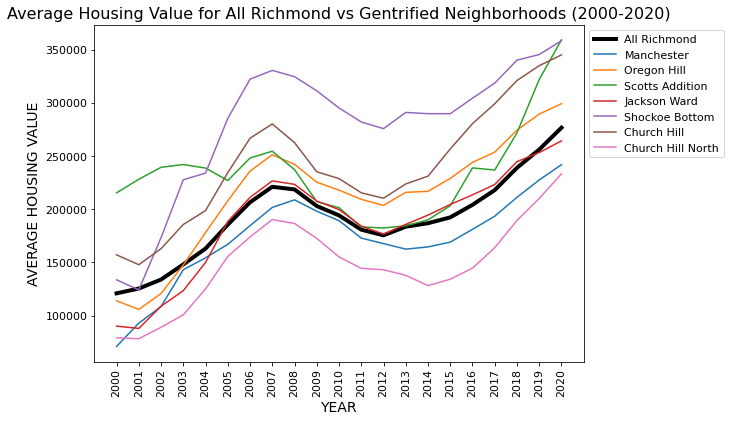

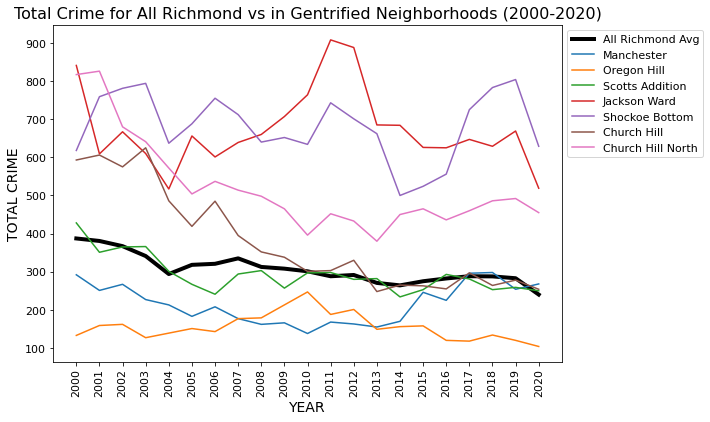

In [133]:
plt.rcParams.update({'font.size': 11})

# Comparative Line Graph for Housing Value
fig = plt.subplots(figsize=(10,6))
plt.plot(allRVA_data['YEAR'], allRVA_data['AVERAGE_HOUSE_PRICE'], color='k', linewidth=4)
plt.plot(manchester_data['YEAR'], manchester_data['AVERAGE_HOUSE_PRICE'])
plt.plot(oregon_hill_data['YEAR'], oregon_hill_data['AVERAGE_HOUSE_PRICE'])
plt.plot(scotts_addition_data['YEAR'], scotts_addition_data['AVERAGE_HOUSE_PRICE'])
plt.plot(jackson_ward_data['YEAR'], jackson_ward_data['AVERAGE_HOUSE_PRICE'])
plt.plot(shockoe_bottom_data['YEAR'], shockoe_bottom_data['AVERAGE_HOUSE_PRICE'])
plt.plot(church_hill_data['YEAR'], church_hill_data['AVERAGE_HOUSE_PRICE'])
plt.plot(church_hill_north_data['YEAR'], church_hill_north_data['AVERAGE_HOUSE_PRICE'])

tick_locations = allRVA_data['YEAR']
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('AVERAGE HOUSING VALUE', fontsize=14)
plt.legend(['All Richmond','Manchester','Oregon Hill','Scotts Addition','Jackson Ward','Shockoe Bottom','Church Hill','Church Hill North'], bbox_to_anchor=(1,1), loc='upper left', ncol=1)
plt.title(f'Average Housing Value for All Richmond vs Gentrified Neighborhoods (2000-2020)', fontsize=16)
plt.tight_layout()

plt.show()

# Comparative Line Graph for Total Crime
allRVA_avgcrime = allRVA_data['TOTAL_CRIME']/123
allRVA_crimeDF = pd.DataFrame({'YEAR': allRVA_data['YEAR'],
                              'AVG_CRIME': allRVA_avgcrime})

fig = plt.subplots(figsize=(10,6))
plt.plot(allRVA_crimeDF['YEAR'], allRVA_crimeDF['AVG_CRIME'], color='k', linewidth=4)
plt.plot(manchester_data['YEAR'], manchester_data['TOTAL_CRIME'])
plt.plot(oregon_hill_data['YEAR'], oregon_hill_data['TOTAL_CRIME'])
plt.plot(scotts_addition_data['YEAR'], scotts_addition_data['TOTAL_CRIME'])
plt.plot(jackson_ward_data['YEAR'], jackson_ward_data['TOTAL_CRIME'])
plt.plot(shockoe_bottom_data['YEAR'], shockoe_bottom_data['TOTAL_CRIME'])
plt.plot(church_hill_data['YEAR'], church_hill_data['TOTAL_CRIME'])
plt.plot(church_hill_north_data['YEAR'], church_hill_north_data['TOTAL_CRIME'])

tick_locations = allRVA_data['YEAR']
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('TOTAL CRIME', fontsize=14)
plt.legend(['All Richmond Avg','Manchester','Oregon Hill','Scotts Addition','Jackson Ward','Shockoe Bottom','Church Hill','Church Hill North'], bbox_to_anchor=(1,1), loc='upper left', ncol=1)
plt.title(f'Total Crime for All Richmond vs in Gentrified Neighborhoods (2000-2020)', fontsize=16)
plt.tight_layout()

plt.show()

In [ ]:
# Make graph with Housing Value (all RVA) and Total Crime (all RVA) over time
### repeat for each neighborhood 
### would look like the line graph the prof sent over slack (2 y-axes, 1 x-axis)

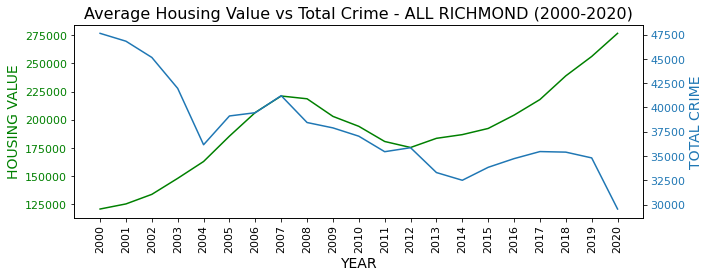

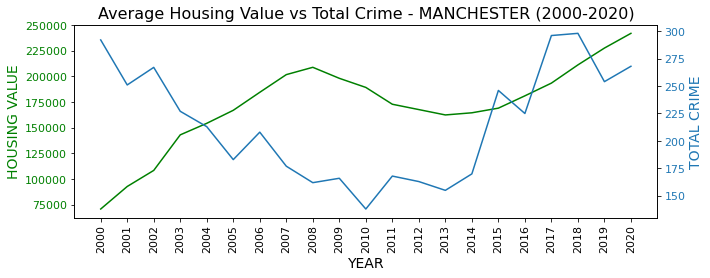

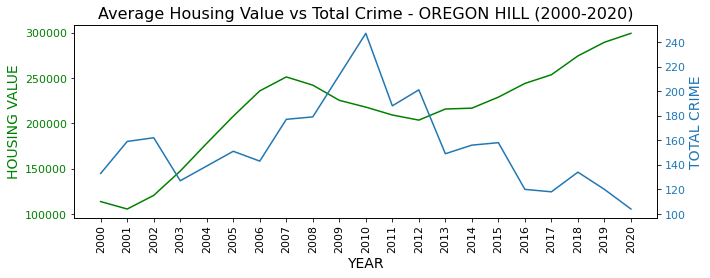

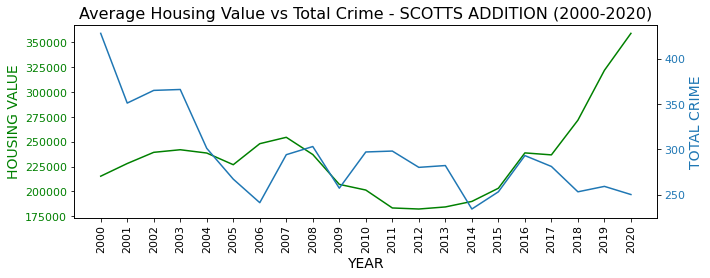

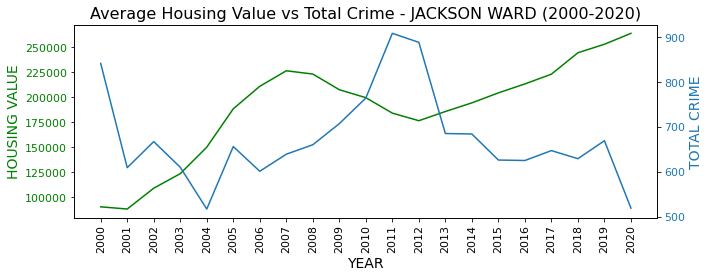

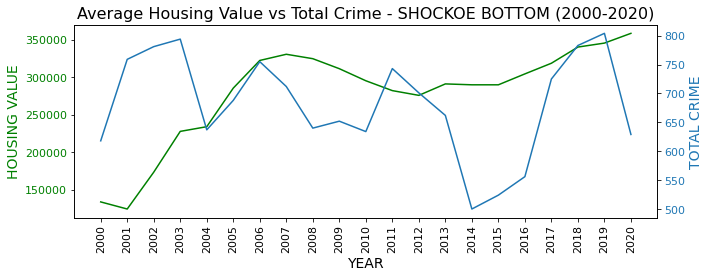

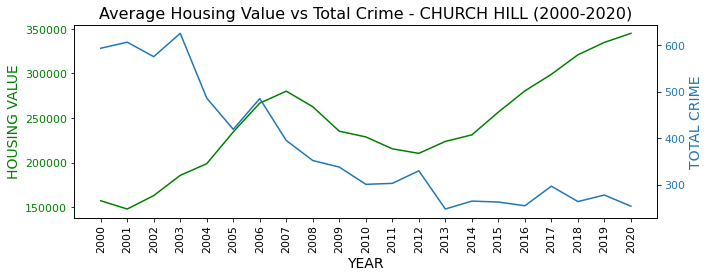

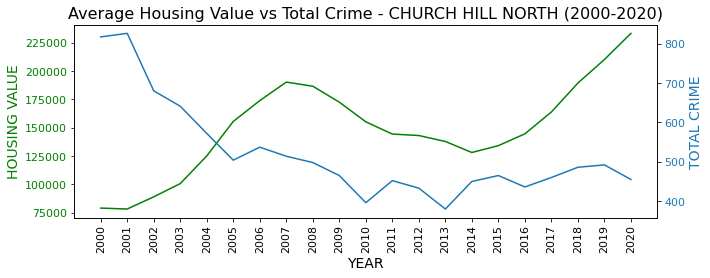

In [130]:
#Comparative Line Graph for Total Crime and Average Housing Value - RICHMOND
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(allRVA_data['YEAR'], allRVA_data['AVERAGE_HOUSE_PRICE'], color='green', label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = allRVA_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - ALL RICHMOND (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(allRVA_data['YEAR'], allRVA_data['TOTAL_CRIME'], label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.show()

#Comparative Line Graph for Total Crime and Average Housing Value - MANCHESTER
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(manchester_data['YEAR'], manchester_data['AVERAGE_HOUSE_PRICE'], color='green', label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = manchester_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - MANCHESTER (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(manchester_data['YEAR'], manchester_data['TOTAL_CRIME'], label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.show()

#Comparative Line Graph for Total Crime and Average Housing Value - OREGON HILL
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(oregon_hill_data['YEAR'], oregon_hill_data['AVERAGE_HOUSE_PRICE'], color='green', label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = oregon_hill_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - OREGON HILL (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(oregon_hill_data['YEAR'], oregon_hill_data['TOTAL_CRIME'], label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.show()

#Comparative Line Graph for Total Crime and Average Housing Value - SCOTTS ADDITION
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(scotts_addition_data['YEAR'], scotts_addition_data['AVERAGE_HOUSE_PRICE'], color='green', label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = scotts_addition_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - SCOTTS ADDITION (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(scotts_addition_data['YEAR'], scotts_addition_data['TOTAL_CRIME'], label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.show()

#Comparative Line Graph for Total Crime and Average Housing Value - JACKSON WARD
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(jackson_ward_data['YEAR'], jackson_ward_data['AVERAGE_HOUSE_PRICE'], color='green', label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = jackson_ward_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - JACKSON WARD (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(jackson_ward_data['YEAR'], jackson_ward_data['TOTAL_CRIME'], label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.show()

#Comparative Line Graph for Total Crime and Average Housing Value - SHOCKOE BOTTOM
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(shockoe_bottom_data['YEAR'], shockoe_bottom_data['AVERAGE_HOUSE_PRICE'], color='green', label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = shockoe_bottom_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - SHOCKOE BOTTOM (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(shockoe_bottom_data['YEAR'], shockoe_bottom_data['TOTAL_CRIME'], label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.show()

#Comparative Line Graph for Total Crime and Average Housing Value - CHURCH HILL
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(church_hill_data['YEAR'], church_hill_data['AVERAGE_HOUSE_PRICE'], color='green', label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = church_hill_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - CHURCH HILL (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(church_hill_data['YEAR'], church_hill_data['TOTAL_CRIME'], label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.show()

#Comparative Line Graph for Total Crime and Average Housing Value - CHURCH HILL NORTH
fig, ax = plt.subplots(figsize=(10,4))
housing = ax.plot(church_hill_north_data['YEAR'], church_hill_north_data['AVERAGE_HOUSE_PRICE'], color='green', label='HOUSING VALUE')
color = housing[0].get_color()
tick_locations = church_hill_north_data['YEAR']
ax.set_xlabel('YEAR', fontsize=14)
ax.set_ylabel('HOUSING VALUE', fontsize=14, color=color)
plt.xticks(tick_locations, labels=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation='vertical')
plt.tick_params(axis='y', labelcolor=color)
plt.title(f'Average Housing Value vs Total Crime - CHURCH HILL NORTH (2000-2020)', fontsize=16)

twinY = ax.twinx()
crime = twinY.plot(church_hill_north_data['YEAR'], church_hill_north_data['TOTAL_CRIME'], label='TOTAL CRIME')
color = crime[0].get_color()
twinY.set_ylabel('TOTAL CRIME', fontsize=14, color=color)
twinY.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.show()


## Box and Whisker Plots -- Distribution of Housing Values and Total for All RVA Neighborhoods (2000 and 2020)

In [ ]:
# Using each neighborhood as a data point...
### Make separate box and whisker plots for Housing Value at 2000 and 2020
### Make separate box and whisker plots for Total Crime at 2000 and 2020
### Locate where the selected neighborhoods fall in all 4 B&W plots 
### --> did percentile position change?



## Test of Significant Difference from Average (All RVA)

In [ ]:
# Compare overall percent change (from 2000-2020) for each selected neighborhood compared to control of All RVA
### chi-square??

